# Introduction
This notebook gives examples for processing spins monitor data.

Logging data is stored in _monitors_ that are defined within the optimization plan. Every iteration of the optimization saves a log file in the form a Pickle file, which contains the values of all the monitors at that point in time. To help process this data, `spins` includes the `log_tools` (`spins.invdes.problem_graph.log_tools`).

There are 3 general ways that these logs can be processed:
1. Defining a `monitor_spec` file that describes how you want data to be plotted.
2. Use lower-level `log_tools` functions to load the data and plot the data.
3. Directly load and process the Pickle files.

## Prepare the log data and plotting information.
The following three cells import the necessary libraries and load the optimization monitor data so it can be processed.

A monitor specification file is a YAML file that lists all the monitors to be plotted as well as how they should be plotted (e.g. taking magnitude, real part, etc.). The monitor specification file also allows you to join multiple monitors into one plot (e.g. for joining different monitors across different transformations).

Note that the monitor specification can be generated in code if desired (instead of actually saving it to a YAML file).

In [17]:
## Import libraries necessary for monitor data processing. ##
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

from spins.invdes.problem_graph import log_tools

In [18]:
## Define filenames. ##

# `save_folder` is the full path to the directory containing the Pickle (.pkl) log files from the optimization.
save_folder = os.getcwd()

## Load the logged monitor data and monitor spec information. ##

# `df` is a pandas dataframe containing all the data loaded from the log Pickle (.pkl) files.
df = log_tools.create_log_data_frame(log_tools.load_all_logs(save_folder))

## Option 1: Using a monitor specification file.

In [19]:
# `monitor_spec_filename` is the full path to the monitor spec yml file.

monitor_spec_filename = os.path.join(save_folder, "monitor_spec.yml")
print(monitor_spec_filename)
# `monitor_descriptions` now contains the information from the monitor_spec.yml file. It follows the format of
# the schema found in `log_tools.monitor_spec`.
monitor_descriptions = log_tools.load_from_yml(monitor_spec_filename)

/home/gaoucsd/anaconda3/envs/ece228/spins-b/examples/invdes/wdm2/monitor_spec.yml


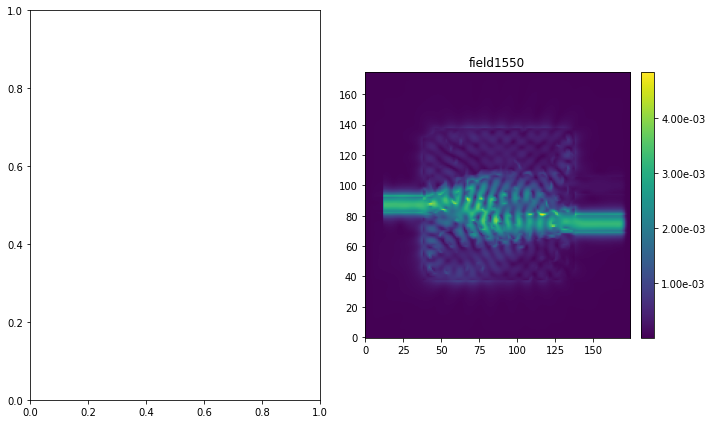

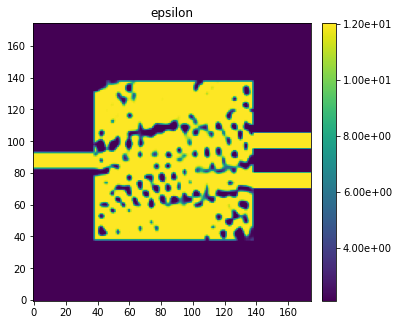

In [20]:
## Plot all monitor data and save into a pdf file in the project folder. ##
# `summary_out_name` is the full path to the pdf that will be generated containing plots of all the log data.

view_filename = os.path.join(save_folder, "3D_4000_3.47_3.57/itr200_numstages6_mode0_grid40_minfea80_ini0.5to0.9")
df = log_tools.create_log_data_frame(log_tools.load_all_logs(view_filename))

# df = log_tools.create_log_data_frame(log_tools.load_all_logs(save_folder))

summary_out_name = os.path.join(save_folder, "results.pdf")

# This command plots all the monitor data contained in the log files, saves it to the specified pdf file, and
# displays to the screen.
log_tools.plot_monitor_data(df, monitor_descriptions, summary_out_name)

## Option 2: Using `log_tools` to extract the data.
The following 2 cells demonstrate extracting specific monitor data of interest in order to export the data or plot it yourself.

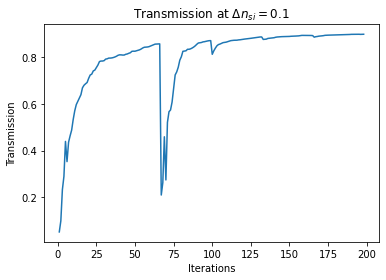

In [21]:
joined_monitor_data = log_tools.get_joined_scalar_monitors(
    df, "power1550", event_name="optimizing", scalar_operation="magnitude_squared")

# Now, the iteration numbers are stored in the list iterations and the overlap monitor power values are 
# stored in the list data. - If desired, these lists can now be exported for plotting in a different program
# or can be plotted manually by the user in python, as demonstrated next.
iterations = joined_monitor_data.iterations
data = joined_monitor_data.data

## Manually plot the power versus iteration data we've retrieved for the monitor of interest. ##
plt.figure()
plt.plot(iterations, data)
plt.xlabel("Iterations")
plt.ylabel("Transmission")
plt.title("Transmission at $\Delta n_{si} = 0.1$")
plt.show()

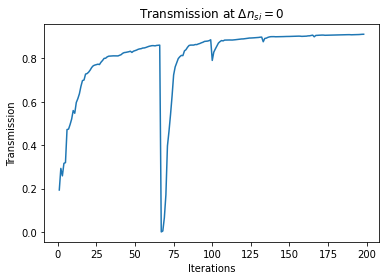

In [22]:
## Get the iterations and data for a specific 1-dimensional scalar monitor (here, power vs iteration is demonstrated)
## for a specific overlap monitor.

# We call `get_joined_scalar_monitors` because we want the monitor data across all iterations rather than
# just the data for particular transformation or iteration number (contrast with `get_single_monitor_data` usage
# below).
joined_monitor_data = log_tools.get_joined_scalar_monitors(
    df, "power21550", event_name="optimizing", scalar_operation="magnitude_squared")

# Now, the iteration numbers are stored in the list iterations and the overlap monitor power values are 
# stored in the list data. - If desired, these lists can now be exported for plotting in a different program
# or can be plotted manually by the user in python, as demonstrated next.
iterations = joined_monitor_data.iterations
data = joined_monitor_data.data

## Manually plot the power versus iteration data we've retrieved for the monitor of interest. ##
plt.figure()
plt.plot(iterations, data)
plt.xlabel("Iterations")
plt.ylabel("Transmission")
plt.title("Transmission at $\Delta n_{si} = 0$")
plt.show()

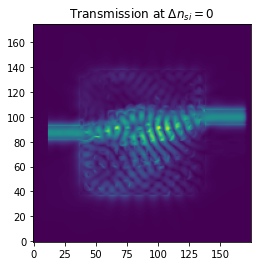

In [23]:
## Get the data for a specific 2-dimensional field slice monitor. ##

# These functions get the monitor information for the monitor name specified above and return the data associated
# with the monitor name. Here we retrieve the last stored field. We can specify `transformation_name` and
# `iteration` to grab data from a particular transformation or iteration.
field_data = log_tools.get_single_monitor_data(df, "field21550")

# `field_data` is now an array with 3 entries, corresponding to the x-, y-, and z- components of the field,
# so we apply a utility function to get the magnitude of the vector.
field_mag = log_tools.process_field(field_data, vector_operation="magnitude")

## Manually plot this 2-dimensional field data. ##
plt.figure()
plt.imshow(np.squeeze(np.array(field_mag.T)), origin="lower")
plt.title("Transmission at $\Delta n_{si} = 0$")
plt.show()

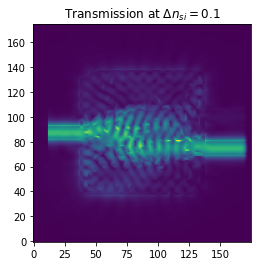

In [24]:
## Get the data for a specific 2-dimensional field slice monitor. ##

# These functions get the monitor information for the monitor name specified above and return the data associated
# with the monitor name. Here we retrieve the last stored field. We can specify `transformation_name` and
# `iteration` to grab data from a particular transformation or iteration.
field_data = log_tools.get_single_monitor_data(df, "field1550")

# `field_data` is now an array with 3 entries, corresponding to the x-, y-, and z- components of the field,
# so we apply a utility function to get the magnitude of the vector.
field_mag = log_tools.process_field(field_data, vector_operation="magnitude")

## Manually plot this 2-dimensional field data. ##
plt.figure()
plt.imshow(np.squeeze(np.array(field_mag.T)), origin="lower")
plt.title("Transmission at $\Delta n_{si} = 0.1$")
plt.show()